# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algoritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

## Cargar y comprobar imágenes

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from skimage.io import imread
import keras
import cv2

In [ ]:
# def read_data(path, im_size):
#     X = []
#     Y = []

#     ##### CODE #####
#     # Iterar sobre todo lo que haya en path
#     for file in os.listdir(path):
        
#         # Leer la imagen a color y aplicarle el resize
#         image = imread(path + file)
#         smallimage = cv2.resize(image, (im_size, im_size))
        
#         # Guardo en X
#         X.append(smallimage)
        
#         category = file.split('.')[0]
#         # Miro si es perro y gato para guardar en Y
#         if category == 'dog':
#             Y.append(1)
#         else:
#             Y.append(0)
        

#     return np.array(X), np.array(Y)
    

# X_train, y_train = read_data(TRAIN_PATH, IMAGE_WIDTH)
# X_test, y_test = read_data(TEST_PATH, IMAGE_WIDTH)

# print(X_train.shape)
# print(X_test.shape)

In [105]:
ROOT_PATH = 'C:/Users/misla/Documents/Bootcamp/Profesor/Convolucionales/paisajes_ejercicio/'
TRAIN_PATH = ROOT_PATH + "seg_train/"
TEST_PATH = ROOT_PATH + "seg_test/"

In [106]:
os.listdir(TRAIN_PATH + '/buildings')

['0.jpg',
 '10006.jpg',
 '1001.jpg',
 '10014.jpg',
 '10018.jpg',
 '10029.jpg',
 '10032.jpg',
 '10056.jpg',
 '1009.jpg',
 '10113.jpg',
 '1012.jpg',
 '10126.jpg',
 '10144.jpg',
 '10151.jpg',
 '10161.jpg',
 '10165.jpg',
 '10176.jpg',
 '10184.jpg',
 '10185.jpg',
 '10191.jpg',
 '10196.jpg',
 '10198.jpg',
 '10205.jpg',
 '10210.jpg',
 '10228.jpg',
 '10231.jpg',
 '10251.jpg',
 '10252.jpg',
 '10257.jpg',
 '10266.jpg',
 '10278.jpg',
 '1028.jpg',
 '10295.jpg',
 '10303.jpg',
 '10306.jpg',
 '10310.jpg',
 '10312.jpg',
 '10316.jpg',
 '10318.jpg',
 '10328.jpg',
 '10350.jpg',
 '10357.jpg',
 '10362.jpg',
 '10367.jpg',
 '10374.jpg',
 '10383.jpg',
 '10402.jpg',
 '1041.jpg',
 '10421.jpg',
 '10444.jpg',
 '1045.jpg',
 '10452.jpg',
 '10466.jpg',
 '10480.jpg',
 '10485.jpg',
 '10489.jpg',
 '10495.jpg',
 '10499.jpg',
 '10500.jpg',
 '10502.jpg',
 '10511.jpg',
 '10520.jpg',
 '10528.jpg',
 '1055.jpg',
 '10553.jpg',
 '10559.jpg',
 '10570.jpg',
 '10576.jpg',
 '1058.jpg',
 '10582.jpg',
 '10598.jpg',
 '10608.jpg',
 '10

In [108]:
os.listdir(TRAIN_PATH)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [107]:
labels_dict = {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}

In [111]:
os.listdir(TRAIN_PATH + '/buildings')

['0.jpg',
 '10006.jpg',
 '1001.jpg',
 '10014.jpg',
 '10018.jpg',
 '10029.jpg',
 '10032.jpg',
 '10056.jpg',
 '1009.jpg',
 '10113.jpg',
 '1012.jpg',
 '10126.jpg',
 '10144.jpg',
 '10151.jpg',
 '10161.jpg',
 '10165.jpg',
 '10176.jpg',
 '10184.jpg',
 '10185.jpg',
 '10191.jpg',
 '10196.jpg',
 '10198.jpg',
 '10205.jpg',
 '10210.jpg',
 '10228.jpg',
 '10231.jpg',
 '10251.jpg',
 '10252.jpg',
 '10257.jpg',
 '10266.jpg',
 '10278.jpg',
 '1028.jpg',
 '10295.jpg',
 '10303.jpg',
 '10306.jpg',
 '10310.jpg',
 '10312.jpg',
 '10316.jpg',
 '10318.jpg',
 '10328.jpg',
 '10350.jpg',
 '10357.jpg',
 '10362.jpg',
 '10367.jpg',
 '10374.jpg',
 '10383.jpg',
 '10402.jpg',
 '1041.jpg',
 '10421.jpg',
 '10444.jpg',
 '1045.jpg',
 '10452.jpg',
 '10466.jpg',
 '10480.jpg',
 '10485.jpg',
 '10489.jpg',
 '10495.jpg',
 '10499.jpg',
 '10500.jpg',
 '10502.jpg',
 '10511.jpg',
 '10520.jpg',
 '10528.jpg',
 '1055.jpg',
 '10553.jpg',
 '10559.jpg',
 '10570.jpg',
 '10576.jpg',
 '1058.jpg',
 '10582.jpg',
 '10598.jpg',
 '10608.jpg',
 '10

In [117]:
os.listdir('/'.join([TRAIN_PATH, 'forest']))

['10007.jpg',
 '10010.jpg',
 '10020.jpg',
 '10030.jpg',
 '10037.jpg',
 '1004.jpg',
 '10050.jpg',
 '10051.jpg',
 '10074.jpg',
 '10078.jpg',
 '10086.jpg',
 '10088.jpg',
 '10089.jpg',
 '10098.jpg',
 '10103.jpg',
 '10116.jpg',
 '10121.jpg',
 '10123.jpg',
 '10135.jpg',
 '10138.jpg',
 '10142.jpg',
 '10145.jpg',
 '10146.jpg',
 '10153.jpg',
 '10154.jpg',
 '10155.jpg',
 '1017.jpg',
 '10180.jpg',
 '10186.jpg',
 '10194.jpg',
 '10197.jpg',
 '10207.jpg',
 '10217.jpg',
 '10223.jpg',
 '10235.jpg',
 '10239.jpg',
 '1024.jpg',
 '10240.jpg',
 '10242.jpg',
 '1025.jpg',
 '10258.jpg',
 '10263.jpg',
 '10275.jpg',
 '10281.jpg',
 '10283.jpg',
 '10285.jpg',
 '10294.jpg',
 '10314.jpg',
 '10320.jpg',
 '10325.jpg',
 '10330.jpg',
 '1034.jpg',
 '10341.jpg',
 '10346.jpg',
 '10347.jpg',
 '10359.jpg',
 '10368.jpg',
 '10370.jpg',
 '10376.jpg',
 '10379.jpg',
 '10387.jpg',
 '10394.jpg',
 '10411.jpg',
 '10417.jpg',
 '10441.jpg',
 '10464.jpg',
 '10492.jpg',
 '10497.jpg',
 '1050.jpg',
 '10510.jpg',
 '10513.jpg',
 '10519.jpg'

In [172]:
os.listdir(TRAIN_PATH)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

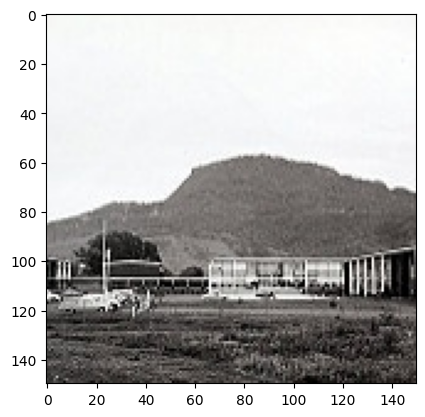

In [173]:
image = plt.imread('/'.join([TRAIN_PATH, 'buildings', '0.jpg']))
plt.imshow(image);

In [122]:
os.listdir(TRAIN_PATH)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [ ]:
os.listdir('/'.join([TRAIN_PATH, 'buil']))

In [174]:
X_train = []
Y_train = []

for folder in os.listdir(TRAIN_PATH):
    if os.path.isdir('/'.join([TRAIN_PATH, folder])):
        for file in os.listdir('/'.join([TRAIN_PATH, folder])):
            image = plt.imread('/'.join([TRAIN_PATH, folder, file]))
            image = cv2.resize(image, (32, 32))
            X_train.append(image)
            Y_train.append(folder)


X_train = np.array(X_train)
Y_train = np.array(Y_train)

print(X_train.shape)
print(Y_train.shape)

(14034, 32, 32, 3)
(14034,)


In [175]:
def im_reader(path, imshape = (32, 32)):
    X = []
    Y = []

    for folder in os.listdir(path):
        if os.path.isdir('/'.join([TRAIN_PATH, folder])):
            for file in os.listdir('/'.join([path, folder])):
                image = plt.imread('/'.join([path, folder, file]))
                image = cv2.resize(image, imshape)
                X.append(image)
                Y.append(folder)
    
    return np.array(X), np.array(Y)

In [176]:
X_test, Y_test = im_reader(TEST_PATH)

In [177]:
X_test.shape

(3000, 32, 32, 3)

In [178]:
Y_test.shape

(3000,)

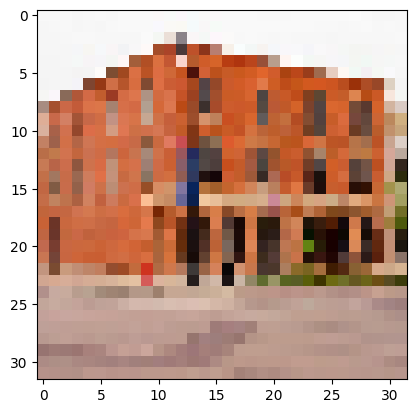

In [179]:
plt.imshow(X_train[10])

In [138]:
Y_train[10]

'buildings'

In [140]:
X_train.max()

255

## Normaliza

In [180]:
X_train_scal = X_train/255
X_test_scal = X_test/255

## Arquitectura de la red

In [181]:
X_train[0].shape

(32, 32, 3)

In [162]:
X_train[0].shape

(32, 32, 3)

In [182]:
capas = [keras.layers.Conv2D(32, (3, 3), activation= 'relu', input_shape = X_train[0].shape),
         keras.layers.MaxPooling2D(pool_size= (2, 2)),
         keras.layers.Conv2D(16, (3, 3), activation= 'relu'),
         keras.layers.MaxPooling2D(pool_size= (2, 2)),
         
         keras.layers.Flatten(),
         
         keras.layers.Dense(100, activation= 'relu'),
         keras.layers.Dense(30, activation= 'relu'),
         keras.layers.Dense(6, activation= 'softmax')]

modelo = keras.models.Sequential(capas)

In [184]:
modelo.compile(optimizer= 'adam', 
               loss= 'sparse_categorical_crossentropy',
               metrics= ['accuracy'])

In [185]:
Y_train_numeric = pd.Series(Y_train).map(labels_dict)

In [186]:
Y_train_numeric

0        0
1        0
2        0
3        0
4        0
        ..
14029    5
14030    5
14031    5
14032    5
14033    5
Length: 14034, dtype: int64

In [187]:
from sklearn.utils import shuffle
X_train_scal, Y_train_numeric = shuffle(X_train_scal, Y_train_numeric, random_state=42)

In [188]:
Y_train_numeric

353      0
13561    5
13806    5
11094    4
8192     3
        ..
5191     2
13418    5
5390     2
860      0
7270     3
Length: 14034, dtype: int64

In [153]:
X_train_scal.shape

(14034, 32, 32, 3)

In [154]:
Y_train_numeric.shape

(14034,)

In [190]:
Y_train_numeric

353      0
13561    5
13806    5
11094    4
8192     3
        ..
5191     2
13418    5
5390     2
860      0
7270     3
Length: 14034, dtype: int64

## Entrenamiento de la red

In [189]:
history = modelo.fit(X_train_scal,
                     Y_train_numeric,
                     batch_size= 32,
                     epochs= 10,
                     validation_split= 0.20)

Epoch 1/10
351/351 [==============================] - 14s 33ms/step - loss: 1.2089 - accuracy: 0.5066 - val_loss: 0.9807 - val_accuracy: 0.6056
Epoch 2/10
351/351 [==============================] - 13s 37ms/step - loss: 0.9334 - accuracy: 0.6379 - val_loss: 0.8700 - val_accuracy: 0.6769
Epoch 3/10
351/351 [==============================] - 13s 36ms/step - loss: 0.8091 - accuracy: 0.6997 - val_loss: 0.7748 - val_accuracy: 0.7150
Epoch 4/10
351/351 [==============================] - 12s 35ms/step - loss: 0.7378 - accuracy: 0.7279 - val_loss: 0.7651 - val_accuracy: 0.7175
Epoch 5/10
351/351 [==============================] - 11s 31ms/step - loss: 0.6926 - accuracy: 0.7449 - val_loss: 0.7610 - val_accuracy: 0.7182
Epoch 6/10
351/351 [==============================] - 11s 33ms/step - loss: 0.6457 - accuracy: 0.7682 - val_loss: 0.7281 - val_accuracy: 0.7321
Epoch 7/10
351/351 [==============================] - 12s 34ms/step - loss: 0.6180 - accuracy: 0.7748 - val_loss: 0.6795 - val_accuracy:

## Evaluación de modelo

In [194]:
Y_test_numeric = pd.Series(Y_test).map(labels_dict)

In [195]:
Y_test_numeric

0       0
1       0
2       0
3       0
4       0
       ..
2995    5
2996    5
2997    5
2998    5
2999    5
Length: 3000, dtype: int64

In [196]:
modelo.evaluate(X_test_scal, Y_test_numeric)

94/94 [==============================] - 1s 10ms/step - loss: 0.6641 - accuracy: 0.7597


[0.6641365885734558, 0.7596666812896729]

In [214]:
X_test_scal[5:6].shape

(1, 32, 32, 3)

In [201]:
modelo.predict(X_test_scal[5:6])

1/1 [==============================] - 0s 180ms/step


array([[0.12283061, 0.02117044, 0.05967561, 0.6855771 , 0.10134131,
        0.00940495]], dtype=float32)

In [202]:
labels_dict

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [199]:
Y_test_numeric[5]

0

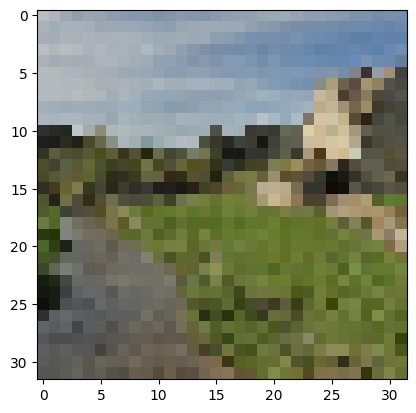

In [200]:
plt.imshow(X_test[5])

In [203]:
from sklearn.metrics import confusion_matrix

In [204]:
import seaborn as sns

In [207]:
modelo.predict(X_test_scal).argmax(axis = 1)

94/94 [==============================] - 1s 11ms/step


array([0, 1, 0, ..., 3, 0, 5], dtype=int64)

94/94 [==============================] - 2s 16ms/step


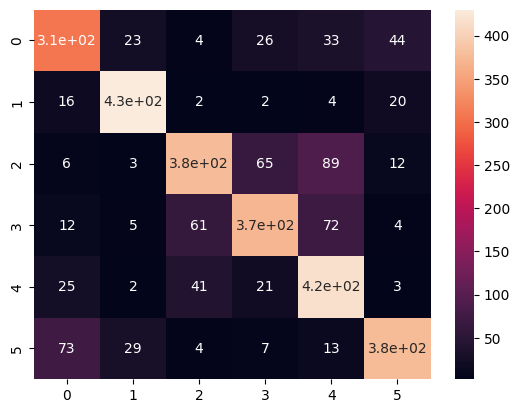

In [211]:
sns.heatmap(confusion_matrix(Y_test_numeric, modelo.predict(X_test_scal).argmax(axis = 1)), annot = True);